In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 1.5 MB/s 


In [2]:
!pip install tensorflow_io==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.1 MB 1.5 MB/s 
     |████████████████████████████████| 2.1 MB 38.2 MB/s 
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.26.0
    Uninstalling tensorflow-io-gcs-filesystem-0.26.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.26.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.26.0
    Uninstalling tensorflow-io-0.26.0:
      Successfully uninstalled tensorflow-io-0.26.0


In [3]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

In [4]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [5]:
print(yamnet_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f298e55cdd0>


In [6]:
testing_wav_file_name = tf.keras.utils.get_file('miaow_16k.wav',
                                                'https://storage.googleapis.com/audioset/miaow_16k.wav',
                                                cache_dir='./',
                                                cache_subdir='test_data')

print(testing_wav_file_name)

229376/215546 [===============================] - 0s 0us/step
./test_data/miaow_16k.wav


In [7]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

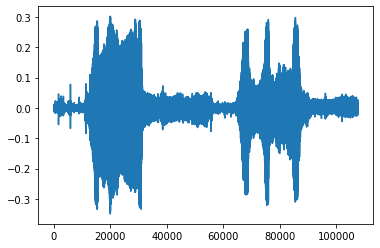

In [8]:
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)

_ = plt.plot(testing_wav_data)

# Play the audio file.
display.Audio(testing_wav_data,rate=16000)

In [9]:
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names =list(pd.read_csv(class_map_path)['display_name'])

for name in class_names[:20]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
...


In [10]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.argmax(class_scores)
inferred_class = class_names[top_class]

print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

The main sound is: Animal
The embeddings shape: (13, 1024)


In [11]:
_ = tf.keras.utils.get_file('esc-50.zip',
                        'https://github.com/karoldvl/ESC-50/archive/master.zip',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

645701632/Unknown - 52s 0us/step

In [12]:
esc50_csv = './datasets/ESC-50-master/meta/esc50.csv'
base_data_path = './datasets/ESC-50-master/audio/'

pd_data = pd.read_csv(esc50_csv)
pd_data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [13]:
my_classes = ['airplane', 'breathing', 'brushing_teeth', 'can_opening', 'car_horn', 'chainsaw', 'chirping_birds', 'church_bells', 'clapping', 'clock_alarm', 'clock_tick', 'coughing', 'cow', 'crackling_fire', 'crickets', 'crow', 'crying_baby', 'dog', 'door_wood_creaks', 'drinking_sipping', 'engine', 'fireworks', 'footsteps', 'frog', 'glass_breaking', 'hand_saw', 'helicopter', 'hen', 'insects', 'keyboard_typing', 'laughing', 'mouse_click', 'pig', 'pouring_water', 'rain', 'rooster', 'sea_waves', 'sheep', 'siren', 'sneezing', 'snoring', 'thunderstorm', 'toilet_flush', 'train', 'vacuum_cleaner', 'washing_machine', 'water_drops', 'wind' ]
map_class_to_id = {'airplane':0, 'breathing':1, 'brushing_teeth':2, 'can_opening':3, 'car_horn':4, 'chainsaw':4, 'chirping_birds':5, 'church_bells':6, 'clapping':7, 'clock_alarm':8, 'clock_tick':9, 'coughing':10, 'cow':11, 'crackling_fire':12, 'crickets':13, 'crow':14, 'crying_baby':15, 'dog':16, 'door_wood_creaks':17, 'drinking_sipping':18, 'engine':19, 'fireworks':20, 'footsteps':21, 'frog':22, 'glass_breaking':23, 'hand_saw':24, 'helicopter':25, 'hen':26, 'insects':27, 'keyboard_typing':28, 'laughing':29, 'mouse_click':30, 'pig':31, 'pouring_water':32, 'rain':33, 'rooster':34, 'sea_waves':35, 'sheep':36, 'siren':37, 'sneezing':38, 'snoring':39, 'thunderstorm':40, 'toilet_flush':41, 'train':42, 'vacuum_cleaner':43, 'washing_machine':44, 'water_drops':45, 'wind':46}

filtered_pd = pd_data[pd_data.category.isin(my_classes)]

class_id = filtered_pd['category'].apply(lambda name: map_class_to_id[name])
filtered_pd = filtered_pd.assign(target=class_id)

full_path = filtered_pd['filename'].apply(lambda row: os.path.join(base_data_path, row))
filtered_pd = filtered_pd.assign(filename=full_path)

filtered_pd.head(20)

,filename,fold,target,category,esc10,src_file,take
0,./datasets/ESC-50-master/audio/1-100032-A-0.wav,1,16,dog,True,100032,A
1,./datasets/ESC-50-master/audio/1-100038-A-14.wav,1,5,chirping_birds,False,100038,A
2,./datasets/ESC-50-master/audio/1-100210-A-36.wav,1,43,vacuum_cleaner,False,100210,A
3,./datasets/ESC-50-master/audio/1-100210-B-36.wav,1,43,vacuum_cleaner,False,100210,B
4,./datasets/ESC-50-master/audio/1-101296-A-19.wav,1,40,thunderstorm,False,101296,A
5,./datasets/ESC-50-master/audio/1-101296-B-19.wav,1,40,thunderstorm,False,101296,B
7,./datasets/ESC-50-master/audio/1-101404-A-34.wav,1,3,can_opening,False,101404,A
8,./datasets/ESC-50-master/audio/1-103298-A-9.wav,1,14,crow,False,103298,A
11,./datasets/ESC-50-master/audio/1-104089-A-22.wav,1,7,clapping,False,104089,A
12,./datasets/ESC-50-master/audio/1-104089-B-22.wav,1,7,clapping,False,104089,B


In [14]:
filenames = filtered_pd['filename']
targets = filtered_pd['target']
folds = filtered_pd['fold']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))

main_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [15]:
def load_wav_for_map(filename, label, fold):
  return load_wav_16k_mono(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
main_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [16]:
# applies the embedding extraction model to a wav data
def extract_embedding(wav_data, label, fold):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),
            tf.repeat(fold, num_embeddings))

# extract embedding
main_ds = main_ds.map(extract_embedding).unbatch()
main_ds.element_spec

(TensorSpec(shape=(1024,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [17]:
cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 5)

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
#train_ds = train_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
from keras.layers import LSTM, CuDNNLSTM

In [ ]:
#model = tf.keras.models.Sequential([
 #   tf.keras.layers.InputLayer(input_shape=( 32, 32, 3 )),
    
 #   tf.keras.layers.ConvLSTM1D( 4, 1, padding='valid', activation='relu'),
 #   tf.keras.layers.MaxPooling1D(2),
 #   tf.keras.layers.Dense(512, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(192, activation='relu'),
#    tf.keras.layers.Dense(10, activation='relu')])

#model.summary()

#optimizer = tf.keras.optimizers.Nadam(
 #   learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
 #   name='Nadam'
#)

#lossfn = tf.keras.losses.SparseCategoricalCrossentropy(
#   from_logits=False,
#  reduction=tf.keras.losses.Reduction.AUTO,
#   name='sparse_categorical_crossentropy'
#)

#model.compile(optimizer=optimizer, loss=lossfn, metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_1 (ConvLSTM1D)  (None, 32, 4)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16, 4)            0         
 1D)                                                             
                                                                 
 dense_21 (Dense)            (None, 16, 512)           2560      
                                                                 
 dropout_1 (Dropout)         (None, 16, 512)           0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_22 (Dense)            (None, 192)               1573056   
                                                      

In [ ]:
#model = tf.keras.Sequential()
#model.add(LSTM(32, input_shape=(1024, 16)))
#model.add(tf.keras.layers.Dense(192, activation='relu'))
#model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(tf.keras.layers.Dense(len(my_classes)))
#model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense_3 (Dense)             (None, 192)               6336      
                                                                 
 dense_4 (Dense)             (None, 512)               98816     
                                                                 
 dense_5 (Dense)             (None, 48)                24624     
                                                                 
Total params: 136,048
Trainable params: 136,048
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model = tf.keras.Sequential()
#model.add(LSTM(32, input_shape=(1024, 16)))
#model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(tf.keras.layers.Dense(len(my_classes)))
#model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                6272      
                                                                 
 dense_6 (Dense)             (None, 512)               16896     
                                                                 
 dense_7 (Dense)             (None, 48)                24624     
                                                                 
Total params: 47,792
Trainable params: 47,792
Non-trainable params: 0
_________________________________________________________________


In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(192, activation='relu'),
    #tf.keras.layers.Dense(192, activation='relu'),
    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(my_classes))
], name='my_model')

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 192)               196800    
                                                                 
 dense_6 (Dense)             (None, 512)               98816     
                                                                 
 dense_7 (Dense)             (None, 48)                24624     
                                                                 
Total params: 320,240
Trainable params: 320,240
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="SGD",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

history = model.fit(train_ds, epochs=150, validation_data=val_ds, callbacks=callback)

Epoch 1/150
360/360 [==============================] - 2s 5ms/step - loss: 3.2971 - accuracy: 0.2893 - val_loss: 2.7944 - val_accuracy: 0.4432
Epoch 2/150
360/360 [==============================] - 2s 4ms/step - loss: 2.1287 - accuracy: 0.5446 - val_loss: 1.9000 - val_accuracy: 0.5323
Epoch 3/150
360/360 [==============================] - 1s 4ms/step - loss: 1.5397 - accuracy: 0.6256 - val_loss: 1.6109 - val_accuracy: 0.5750
Epoch 4/150
360/360 [==============================] - 2s 4ms/step - loss: 1.3207 - accuracy: 0.6599 - val_loss: 1.4697 - val_accuracy: 0.6109
Epoch 5/150
360/360 [==============================] - 1s 4ms/step - loss: 1.2066 - accuracy: 0.6760 - val_loss: 1.4001 - val_accuracy: 0.6130
Epoch 6/150
360/360 [==============================] - 1s 4ms/step - loss: 1.1387 - accuracy: 0.6901 - val_loss: 1.3912 - val_accuracy: 0.6182
Epoch 7/150
360/360 [==============================] - 2s 4ms/step - loss: 1.0932 - accuracy: 0.6992 - val_loss: 1.3679 - val_accuracy: 0.6284

In [87]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

120/120 [==============================] - 1s 3ms/step - loss: 1.8132 - accuracy: 0.6203
Loss:  1.8132387399673462
Accuracy:  0.620312511920929


In [88]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = model(embeddings).numpy()

inferred_class = my_classes[result.mean(axis=0).argmax()]
print(f'The main sound is: {inferred_class}')

The main sound is: helicopter


In [89]:
class ReduceMeanLayer(tf.keras.layers.Layer):
  def __init__(self, axis=0, **kwargs):
    super(ReduceMeanLayer, self).__init__(**kwargs)
    self.axis = axis

  def call(self, input):
    return tf.math.reduce_mean(input, axis=self.axis)

In [90]:
saved_model_path = './dogs_and_cats_yamnet'

input_segment = tf.keras.layers.Input(shape=(), dtype=tf.float32, name='audio')
embedding_extraction_layer = hub.KerasLayer(yamnet_model_handle,
                                            trainable=False, name='yamnet')
_, embeddings_output, _ = embedding_extraction_layer(input_segment)
serving_outputs = model(embeddings_output)
serving_outputs = ReduceMeanLayer(axis=0, name='classifier')(serving_outputs)
serving_model = tf.keras.Model(input_segment, serving_outputs)
serving_model.save(saved_model_path, include_optimizer=False)

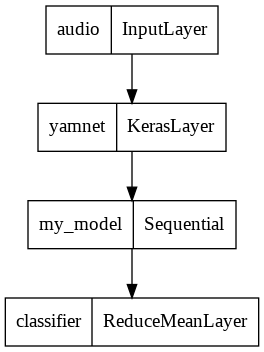

In [91]:
tf.keras.utils.plot_model(serving_model)

In [92]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [93]:
reloaded_results = reloaded_model(testing_wav_data)
cat_or_dog = my_classes[tf.argmax(reloaded_results)]
print(f'The main sound is: {cat_or_dog}')

The main sound is: helicopter


In [94]:
serving_results = reloaded_model.signatures['serving_default'](testing_wav_data)
cat_or_dog = my_classes[tf.argmax(serving_results['classifier'])]
print(f'The main sound is: {cat_or_dog}')


The main sound is: helicopter


./datasets/ESC-50-master/audio/5-200461-A-11.wav
Waveform values: [ 2.2064242e-07 -6.3755027e-07  3.3489860e-07 ...  5.2969009e-02
  1.5365590e-02  1.7047276e-04]


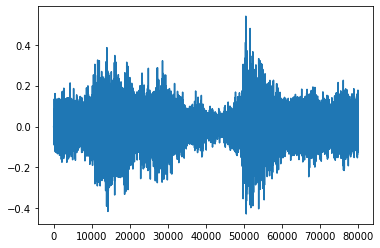

In [108]:
test_pd = filtered_pd.loc[filtered_pd['fold'] == 5]
row = test_pd.sample(1)
filename = row['filename'].item()
print(filename)
waveform = load_wav_16k_mono(filename)
print(f'Waveform values: {waveform}')
_ = plt.plot(waveform)

display.Audio(waveform, rate=16000)

In [109]:
# Run the model, check the output.
scores, embeddings, spectrogram = yamnet_model(waveform)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.argmax(class_scores)
inferred_class = class_names[top_class]
top_score = class_scores[top_class]
print(f'[YAMNet] The main sound is: {inferred_class} ({top_score})')



[YAMNet] The main sound is: Water (0.34761375188827515)


In [110]:
reloaded_results = reloaded_model(waveform)
your_top_class = tf.argmax(reloaded_results)
your_inferred_class = my_classes[your_top_class]
class_probabilities = tf.nn.softmax(reloaded_results, axis=-1)
your_top_score = class_probabilities[your_top_class]
print(f'[Your model] The main sound is: {your_inferred_class} ({your_top_score})')

[Your model] The main sound is: rooster (0.9993243217468262)
